# Project milestone 2 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json
from wordcloud import WordCloud, STOPWORDS
import gzip

In [2]:
data_folder_CMU = './data/MovieSummaries/'
data_folder_IMDB = './IMDb data/'

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 1. Contextual analysis of the datasets used

#### Movie metadata CMU dataset

In [4]:
cmu_movie_metadata = pd.read_csv(data_folder_CMU + 'movie.metadata.tsv', sep ="\t", header=None
                      , names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name'
                       ,'Movie release date','Movie box office revenue','Movie runtime',
                       'Movie languages', 'Movie countries','Movie genres'], index_col = 'Wikipedia movie ID')

cmu_movie_metadata.head(5)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


##### Most frequent words in titles

Let's print the most recurrent words in the movie names :

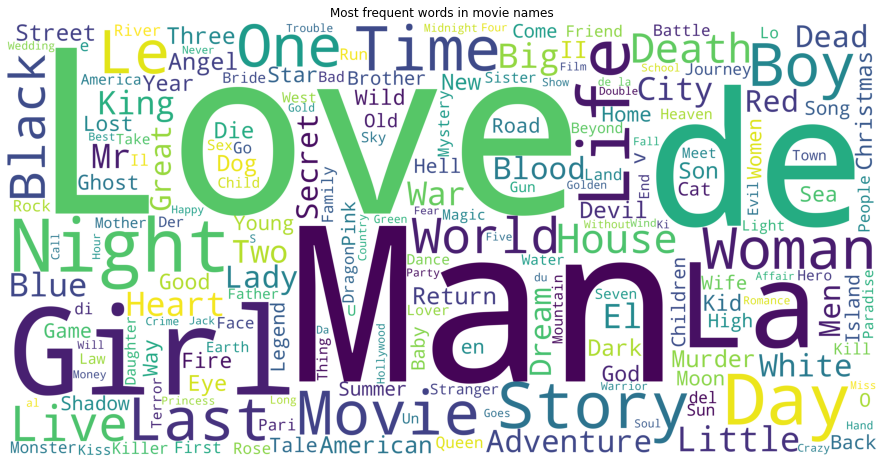

In [5]:
wordcloud_df = cmu_movie_metadata.copy()
wordcloud_df['Movie name'] = wordcloud_df['Movie name'].astype('str')
title_corpus = ' '.join(wordcloud_df['Movie name'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most frequent words in movie names')
plt.show()

##### Number of movies per year

In [6]:
print('There are {} different movies in this dataset'.format(len(cmu_movie_metadata)))

There are 81741 different movies in this dataset


Let's see from what years come the movies in our dataset :

Text(0.5, 1.0, 'Number of movies released per year')

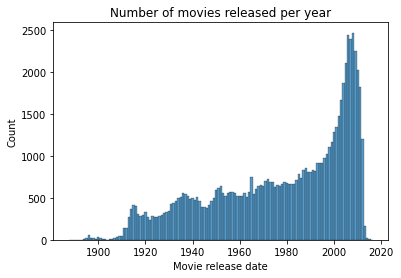

In [7]:
cmu_movie_metadata["Movie release date"] = pd.to_datetime(cmu_movie_metadata["Movie release date"],errors = 'coerce', utc = True).dt.year
sns.histplot(cmu_movie_metadata['Movie release date'], discrete = True)
plt.title('Number of movies released per year')

We observe that the number of movies released each year (present in the dataset) increases in a linear way between 1920s and 1995. And then the increase in number of movies per year is exponential.

##### Genres, languages, and countries of the movies in the dataset

In [8]:
cmu_movie_metadata['Movie languages'] = cmu_movie_metadata['Movie languages'].apply(lambda x: json.loads(x)) 
cmu_movie_metadata['Movie languages'] = cmu_movie_metadata['Movie languages'].apply(lambda x: list(x.values()))
cmu_movie_metadata['Movie countries'] = cmu_movie_metadata['Movie countries'].apply(lambda x: json.loads(x)) 
cmu_movie_metadata['Movie countries'] = cmu_movie_metadata['Movie countries'].apply(lambda x: list(x.values()))
cmu_movie_metadata['Movie genres'] = cmu_movie_metadata['Movie genres'].apply(lambda x: json.loads(x)) 
cmu_movie_metadata['Movie genres'] = cmu_movie_metadata['Movie genres'].apply(lambda x: list(x.values()))

In [9]:
languages_dict = {}
for i in cmu_movie_metadata['Movie languages']:
    for j in i:
        if j not in languages_dict:
            languages_dict[j] = 1
        else:
            languages_dict[j] += 1
            
countries_dict = {}
for i in cmu_movie_metadata['Movie countries']:
    for j in i:
        if j not in countries_dict:
            countries_dict[j] = 1
        else:
            countries_dict[j] += 1     
            
genres_dict = {}
for i in cmu_movie_metadata['Movie genres']:
    for j in i:
        if j not in genres_dict:
            genres_dict[j] = 1
        else:
            genres_dict[j] += 1

            
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

Text(0.5, 0, '')

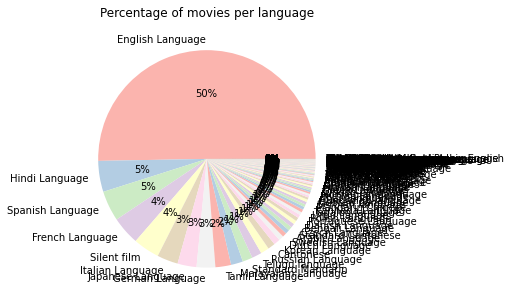

In [10]:
# Distribution of the 10 genres (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

to_1D(cmu_movie_metadata['Movie languages']).value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(5, 5), colors=colors)
plt.title('Percentage of movies per language')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

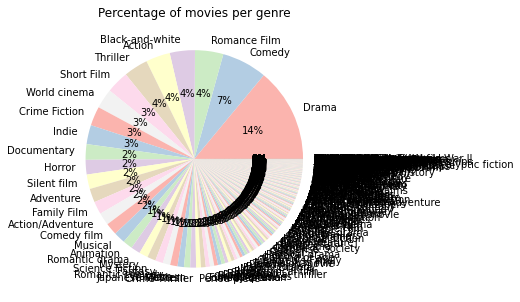

In [11]:
to_1D(cmu_movie_metadata['Movie genres']).value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(5, 5), colors=colors)
plt.title('Percentage of movies per genre')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

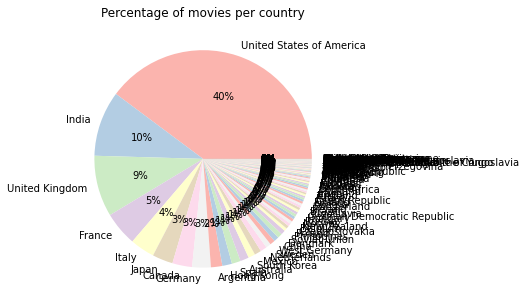

In [12]:
to_1D(cmu_movie_metadata['Movie countries']).value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(5, 5), colors=colors)
plt.title('Percentage of movies per country')
plt.ylabel('')
plt.xlabel('')

#### Character metadata CMU dataset

In [13]:
char_metadata = pd.read_csv(data_folder_CMU + 'character.metadata.tsv', sep ="\t", header=None
                      , names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'
                       ,'Character name','Actor date of birth','Actor gender',
                       'Actor height', 'Actor ethnicity','Actor name','Actor age at movie release',
                        'Freebase character/actor map ID', 'Freebase character ID',
                        'Freebase actor ID'], index_col = 'Wikipedia movie ID')

char_metadata.head(3)

,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
Wikipedia movie ID,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


##### Percentage of women/men actors in the dataset

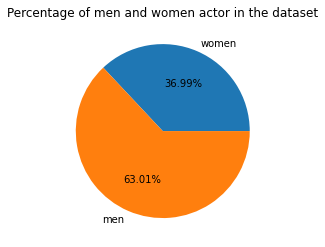

In [14]:
df_fem = char_metadata[char_metadata['Actor gender'] == 'F']
df_masc = char_metadata[char_metadata['Actor gender'] == 'M']
mylabels = ["women", "men"]
plt.pie(np.array([df_fem['Actor name'].nunique(),df_masc['Actor name'].nunique()]), labels = mylabels, autopct='%1.2f%%')
plt.title("Percentage of men and women actor in the dataset")
plt.show()

##### Ethnicities

In [15]:
# loading queried look-up table for mapping ethnicities and freebase-IDs
ethnic_df = pd.read_csv('./Freebase_ids/' + 'ethnic_group_query.csv')
ethnic_df.rename(columns = {'freebaseID':'Actor ethnicity'}, inplace = True)
merged_df = char_metadata.merge(ethnic_df, how = 'left', on = 'Actor ethnicity')

In [16]:
df_no_dup = merged_df.drop_duplicates(subset = 'Freebase actor ID')

Text(0.5, 0, '')

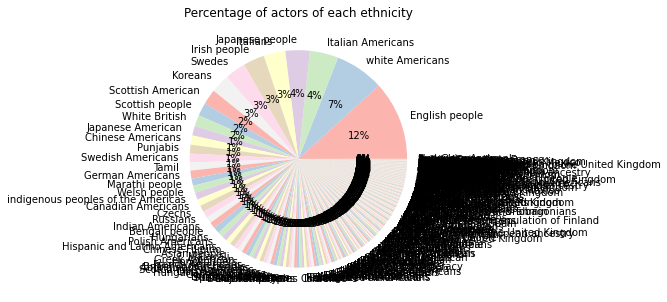

In [17]:
d = df_no_dup['name'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(5, 5), colors=colors)
plt.title('Percentage of actors of each ethnicity')
plt.ylabel('')
plt.xlabel('')

#### IMDb dataset

In [69]:
f = gzip.open(data_folder_IMDB + './title.principals.tsv.gz','rb')
df_titles_principal = pd.read_csv(f, sep='\t')
df_titles_principal.head(5)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [70]:
f=gzip.open(data_folder_IMDB + './name.basics.tsv.gz','rb')
df_name_basics = pd.read_csv(f, sep='\t')
df_name_basics.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0050986,tt0060827,tt0083922"


In [71]:
df_principal_actors = df_titles_principal[df_titles_principal['category'].str.contains('actress|actor')]
df_merged = df_principal_actors.merge(df_name_basics, how='left', on='nconst')
df_merged = df_merged.drop(columns = ['birthYear', 'deathYear', 'knownForTitles', 'primaryProfession' ])
df_merged.head(5)

,tconst,ordering,nconst,category,job,characters,primaryName
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",Charles Kayser
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",John Ott
2,tt0000007,1,nm0179163,actor,\N,\N,James J. Corbett
3,tt0000007,2,nm0183947,actor,\N,\N,Peter Courtney
4,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]",Fred Ott


In [72]:
f = gzip.open(data_folder_IMDB + '/title.basics.tsv.gz', 'rb')
df_title_basics =  pd.read_csv(f, sep='\t')
df_title_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [73]:
print("There are {} titles in the IMDb dataset".format(len(df_title_basics)))

There are 9363390 titles in the IMDb dataset


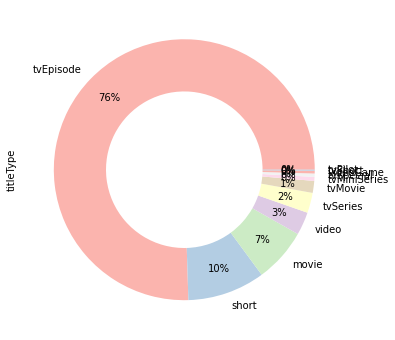

In [74]:
df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4), colors = colors)
plt.show()

Let's focus only on IMDb movies

In [75]:
df_movie_basics = df_title_basics[df_title_basics['titleType'] == 'movie']
print("There are {} movies in the IMDb dataset".format(len(df_movie_basics)))

There are 626772 movies in the IMDb dataset


In [76]:
df_movie_basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [77]:
final_df = df_merged.merge(df_movie_basics, how='left', on='tconst')
final_df.head(5)

,tconst,ordering,nconst,category,job,characters,primaryName,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",Charles Kayser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",John Ott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0000007,1,nm0179163,actor,\N,\N,James J. Corbett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0000007,2,nm0183947,actor,\N,\N,Peter Courtney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]",Fred Ott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
final_df = final_df.dropna(subset = ['primaryTitle'])
final_df = final_df.drop(columns = ['isAdult', 'endYear', 'titleType', 'job', 'originalTitle'])

In [79]:
final_df.head(5)

,tconst,ordering,nconst,category,characters,primaryName,primaryTitle,startYear,runtimeMinutes,genres
5,tt0000009,1,nm0063086,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]",Blanche Bayliss,Miss Jerry,1894,45,Romance
6,tt0000009,2,nm0183823,actor,"[""Mr. Hamilton""]",William Courtenay,Miss Jerry,1894,45,Romance
7,tt0000009,3,nm1309758,actor,"[""Chauncey Depew - the Director of the New Yor...",Chauncey Depew,Miss Jerry,1894,45,Romance
231,tt0000502,1,nm0215752,actor,\N,Antonio del Pozo,Bohemios,1905,100,\N
232,tt0000502,2,nm0252720,actor,\N,El Mochuelo,Bohemios,1905,100,\N


# Dump from now (observations/issues)

In [114]:
women_ordering = final_df[final_df['category'] == 'actress']
men_ordering = final_df[final_df['category'] == 'actor']
women_ordering = women_ordering[women_ordering['startYear'] >= '1950']
men_ordering = men_ordering[men_ordering['startYear'] >= '1950']
women_ordering = women_ordering[women_ordering['startYear'] <= '2020']
men_ordering = men_ordering[men_ordering['startYear'] <= '2020']

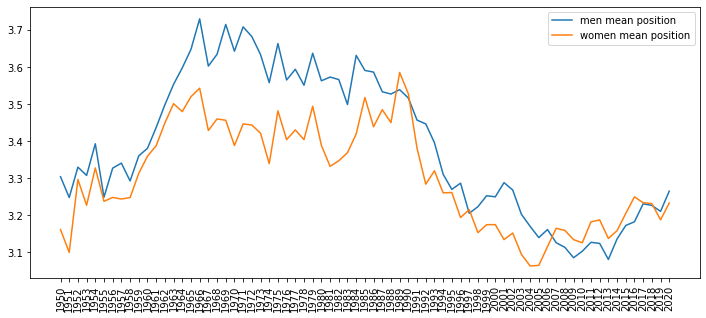

In [117]:
women_groups = women_ordering.groupby(['startYear', 'category'], as_index = False)
men_groups = men_ordering.groupby(['startYear', 'category'], as_index = False)

men_groups = men_groups.apply(lambda x: pd.Series({
    'mean order' : x['ordering'].mean()
}))

women_groups = women_groups.apply(lambda x: pd.Series({
    'mean order' : x['ordering'].mean()
}))

groups.sample(5)

plt.figure(figsize=(12,5))
plt.plot( ["%s" % item for item in men_groups.startYear.to_list()], men_groups['mean order'], label = 'men mean position')
plt.plot( ["%s" % item for item in women_groups.startYear.to_list()], women_groups['mean order'], label = 'women mean position')
plt.xticks(rotation = 90 )
plt.legend()
        
plt.show()

 *IT IS HARD TO JOIN THE DATA, MANY MOVIES HAVE THE SAME NAME, NOT THAT MANY MATCH !*

In [56]:
df_linked = cmu_movie_metadata.merge(final_df, how = 'inner',left_on = 'Movie name', right_on = 'primaryName')

In [57]:
df_linked.head(5)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,tconst,ordering,nconst,category,characters,primaryName,primaryTitle,startYear,runtimeMinutes,genres
0,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",tt0867460,4,nm2625139,actor,"[""The Doggie""]",Baby Boy,Uchuujin from Outer Space,2007,165,"Comedy,Sci-Fi"
1,/m/02rm6l8,Innocence,1997.0,NaN,110.0,[Turkish Language],[Turkey],"[Crime Fiction, Drama, Crime Drama]",tt2327367,8,nm1505492,actress,\N,Innocence,La cripta,2012,\N,\N
2,/m/0ch58zq,Innocence,2011.0,NaN,95.0,[Czech Language],[Czech Republic],"[Thriller, Drama]",tt2327367,8,nm1505492,actress,\N,Innocence,La cripta,2012,\N,\N
3,/m/03qpbml,Innocence,2004.0,NaN,115.0,[French Language],"[France, Belgium, Japan, United Kingdom]","[Mystery, Japanese Movies, Drama, Art film, Wo...",tt2327367,8,nm1505492,actress,\N,Innocence,La cripta,2012,\N,\N
4,/m/02qck1p,Innocence,NaN,NaN,100.0,[Thai Language],[Thailand],[Documentary],tt2327367,8,nm1505492,actress,\N,Innocence,La cripta,2012,\N,\N


In [58]:
len(df_linked)

18701

In [59]:
len(df_linked.drop_duplicates(subset = 'Movie name'))

1290

In [60]:
len(cmu_movie_metadata)

81741

## 2. Cleaning and cooking the data

## 3. Merging IMDb and CMU datasets